In [49]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [50]:
df=pd.read_csv("/content/sample_data/ecommerce_transactions.csv")
df.head()

,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date
0,1,Ava Hall,63,Mexico,Clothing,780.69,Debit Card,2023-04-14
1,2,Sophia Hall,59,India,Beauty,738.56,PayPal,2023-07-30
2,3,Elijah Thompson,26,France,Books,178.34,Credit Card,2023-09-17
3,4,Elijah White,43,Mexico,Sports,401.09,UPI,2023-06-21
4,5,Ava Harris,48,Germany,Beauty,594.83,Net Banking,2024-10-29


In [51]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    50000 non-null  int64  
 1   User_Name         50000 non-null  object 
 2   Age               50000 non-null  int64  
 3   Country           50000 non-null  object 
 4   Product_Category  50000 non-null  object 
 5   Purchase_Amount   50000 non-null  float64
 6   Payment_Method    50000 non-null  object 
 7   Transaction_Date  50000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.1+ MB


In [52]:
df.describe()
df.drop("Transaction_ID",axis=1,inplace=True)


In [53]:
df.head(2)
df.Age.nunique()
df.isnull().sum()
df.dropna(inplace=True)
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [54]:
df.head()

,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date
0,Ava Hall,63,Mexico,Clothing,780.69,Debit Card,2023-04-14
1,Sophia Hall,59,India,Beauty,738.56,PayPal,2023-07-30
2,Elijah Thompson,26,France,Books,178.34,Credit Card,2023-09-17
3,Elijah White,43,Mexico,Sports,401.09,UPI,2023-06-21
4,Ava Harris,48,Germany,Beauty,594.83,Net Banking,2024-10-29


In [55]:
df.Country.nunique()
df.Country.unique()
df.Product_Category.nunique()
df.Payment_Method.nunique()
df["Transaction_Date"]=pd.to_datetime(df["Transaction_Date"])
df["Purchased_Year"]=df["Transaction_Date"].dt.year
df["Purchased_Month"]=df["Transaction_Date"].dt.month


In [56]:
dict1={
    1:"January",
    2:"February",
    3:"March",
    4:"April",
    5:"May",
    6:"June",
    7:"July",
    8:"August",
    9:"September",
    10:"October",
    11:"November",
    12:"December"
}


df["Month_name"]=[dict1[month] for month in df["Purchased_Month"].values]
df.head()
df=df.drop(["Purchased_Month","Transaction_Date"],axis=1)
df.head()

,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Purchased_Year,Month_name
0,Ava Hall,63,Mexico,Clothing,780.69,Debit Card,2023,April
1,Sophia Hall,59,India,Beauty,738.56,PayPal,2023,July
2,Elijah Thompson,26,France,Books,178.34,Credit Card,2023,September
3,Elijah White,43,Mexico,Sports,401.09,UPI,2023,June
4,Ava Harris,48,Germany,Beauty,594.83,Net Banking,2024,October


In [57]:
df.Product_Category.nunique()

8

<Axes: title={'center': 'Overall Representation'}, xlabel='Age', ylabel='Number of Customers'>

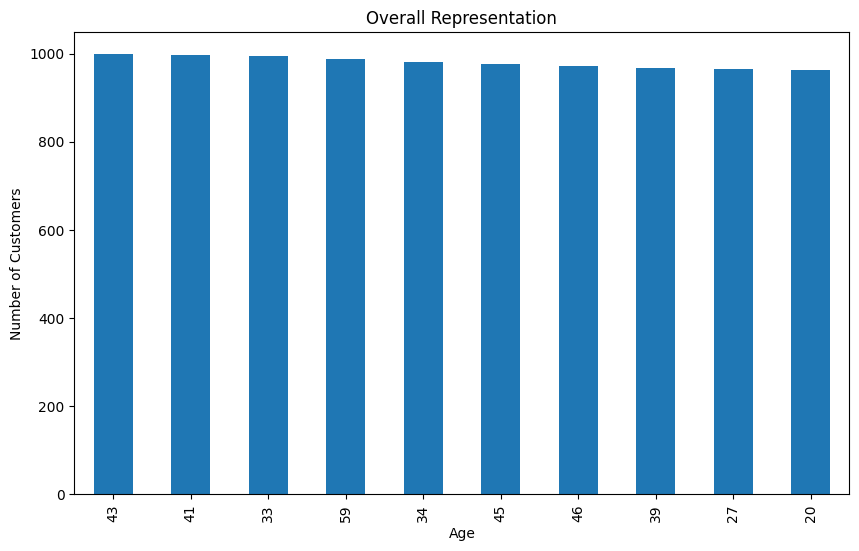

In [58]:
#Overall Representation
df["Age"].value_counts().sort_values(ascending=False).head(10).plot(kind="bar",xlabel="Age",ylabel="Number of Customers",title="Overall Representation",figsize=(10,6))

<Axes: title={'center': 'Age wise customers'}, xlabel='Age Level', ylabel='Number of Customers'>

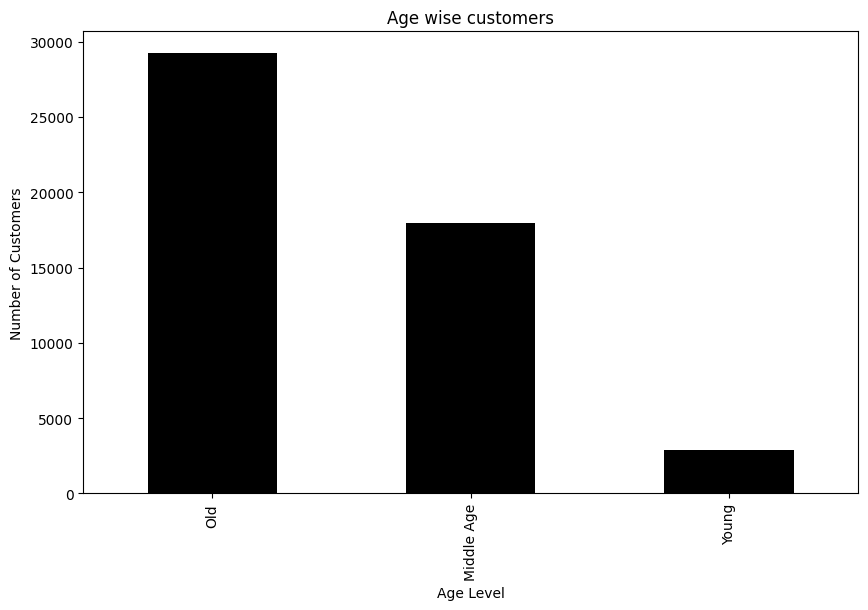

In [59]:
def get_age(x):
  if 0<x<=20:
    return "Young"
  elif 20<x<40:
      return "Middle Age"
  else:
    return "Old"
df["Age_Level"]=df["Age"].apply(lambda x:get_age(x))
df.head()
df.Age_Level.value_counts().plot(kind="bar",xlabel="Age Level",ylabel="Number of Customers",title="Age wise customers",figsize=(10,6),color="black")

In [60]:
grouped_data=df.groupby("Age_Level")["Product_Category"].value_counts().reset_index()
grouped_data

,Age_Level,Product_Category,count
0,Middle Age,Home & Kitchen,2287
1,Middle Age,Toys,2283
2,Middle Age,Books,2266
3,Middle Age,Sports,2261
4,Middle Age,Clothing,2252
5,Middle Age,Electronics,2239
6,Middle Age,Grocery,2173
7,Middle Age,Beauty,2165
8,Old,Toys,3754
9,Old,Electronics,3714


Text(0.5, 1.0, 'Agewise purchase count')

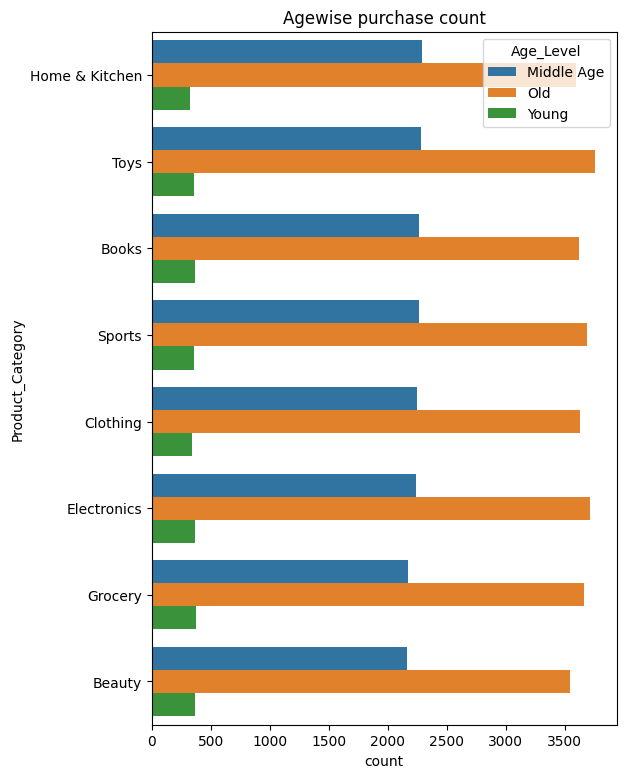

In [61]:
plt.figure(figsize=(6,9))
sns.barplot(data=grouped_data,hue="Age_Level",x="count",y="Product_Category")
plt.title("Agewise purchase count")

In [62]:
df.head()

,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Purchased_Year,Month_name,Age_Level
0,Ava Hall,63,Mexico,Clothing,780.69,Debit Card,2023,April,Old
1,Sophia Hall,59,India,Beauty,738.56,PayPal,2023,July,Old
2,Elijah Thompson,26,France,Books,178.34,Credit Card,2023,September,Middle Age
3,Elijah White,43,Mexico,Sports,401.09,UPI,2023,June,Old
4,Ava Harris,48,Germany,Beauty,594.83,Net Banking,2024,October,Old


In [63]:
ploted=df.Country.value_counts().reset_index()
ploted.head()

,Country,count
0,Canada,5082
1,Mexico,5059
2,Germany,5047
3,India,4996
4,France,4993


In [64]:
ax=px.bar(ploted,x="Country",y="count",height=400,
    width=700)
ax.update_layout(
    xaxis_title="Name of Country",
    yaxis_title="Number Purchshed",
    title_font_color="blue",
    title_font_family="Times New Roman",
    title_font_size=20,
    title="Number of items sold countywise"





)

In [65]:
grouped_df_numerical=df.groupby("Country")[["Purchase_Amount","Age","Purchased_Year"]].agg(["sum","mean","count"]).reset_index()
#grouped_df_numerial.columns=["_".join(col) for col in grouped_df_numerial.columns]
grouped_df_numerical.columns=["_".join(col) for col in grouped_df_numerical.columns]
grouped_df_numerical.drop(["Purchase_Amount_count","Age_sum","Age_count","Purchased_Year_count","Purchased_Year_sum","Purchased_Year_mean"],axis=1,inplace=True)

In [66]:
ax=px.bar(grouped_df_numerical,x="Country_",y="Purchase_Amount_mean",color="Purchase_Amount_sum")
ax.update_layout(
    title="Sum of money spent for purchase of a product per country",
    xaxis_title="Country",
    yaxis_title="Purchase Amount[$]",
    title_font_family="Brush Script MT",
    title_font_size=20,
    title_font_color="red",
    height=400,
    width=700

)


In [67]:
grouped_df_numerical.head()

,Country_,Purchase_Amount_sum,Purchase_Amount_mean,Age_mean
0,Australia,2514911.65,504.495817,43.910933
1,Brazil,2507287.54,506.727474,44.090542
2,Canada,2544335.12,500.656261,43.862062
3,France,2545739.19,509.861644,43.911877
4,Germany,2502442.20,495.827660,44.244502


<ipython-input-68-59ab1990eae3>:2: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



Text(0, 0.5, 'Mean Age of buyers')

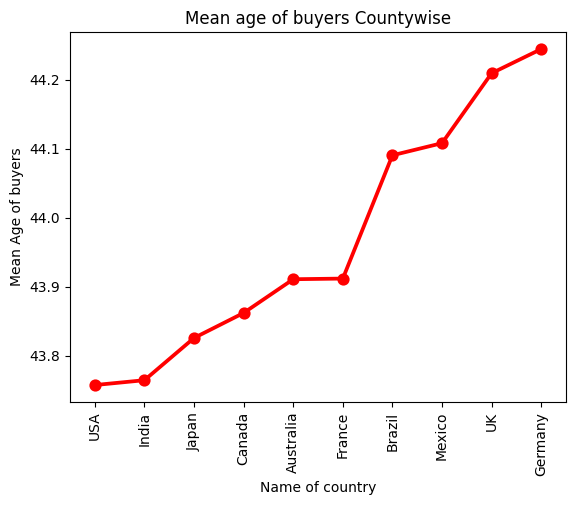

In [68]:
ax=sns.pointplot(data=grouped_df_numerical.sort_values(by="Age_mean"),x="Country_",y="Age_mean",color="r")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Mean age of buyers Countywise")
ax.set_xlabel("Name of country")
ax.set_ylabel("Mean Age of buyers")

<Axes: xlabel='Country', ylabel='count'>

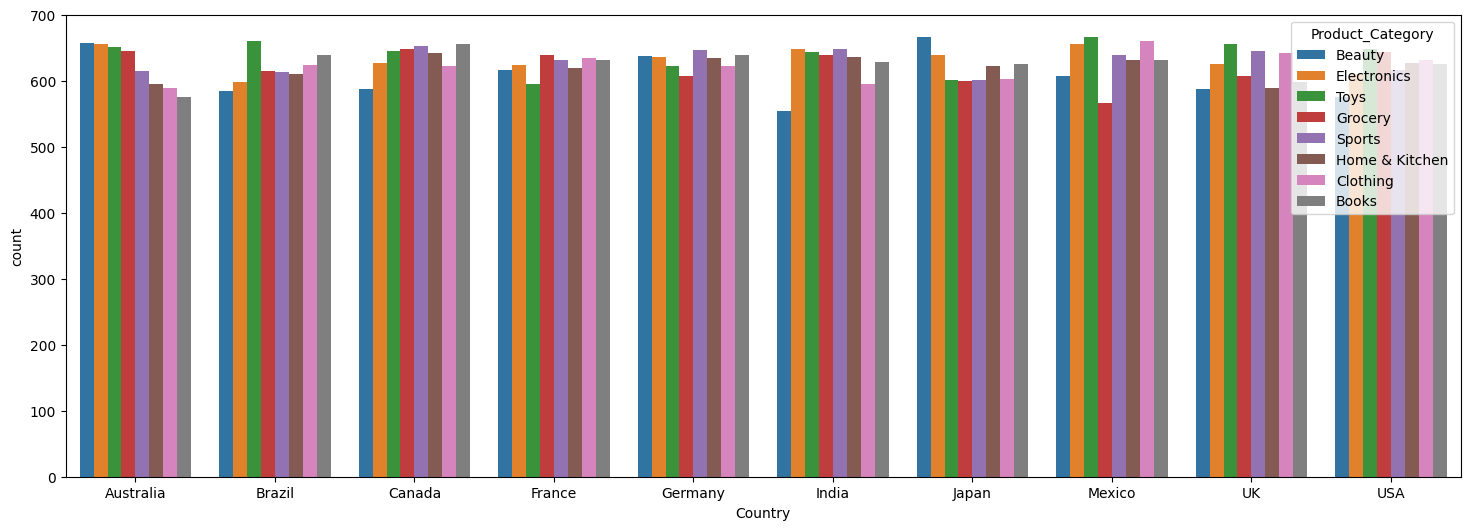

In [69]:
grouped_df_catagorical=df.groupby("Country")["Product_Category"].agg("value_counts").reset_index()
grouped_df_catagorical
plt.figure(figsize=(18,6))
sns.barplot(data=grouped_df_catagorical,x="Country",hue="Product_Category",y="count")


Looks Like australians dont like books that much !!!

In [70]:
df.head()

,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Purchased_Year,Month_name,Age_Level
0,Ava Hall,63,Mexico,Clothing,780.69,Debit Card,2023,April,Old
1,Sophia Hall,59,India,Beauty,738.56,PayPal,2023,July,Old
2,Elijah Thompson,26,France,Books,178.34,Credit Card,2023,September,Middle Age
3,Elijah White,43,Mexico,Sports,401.09,UPI,2023,June,Old
4,Ava Harris,48,Germany,Beauty,594.83,Net Banking,2024,October,Old


In [71]:
numerical_cols=df.select_dtypes(include=["number"]).columns.tolist()
numerical_cols

['Age', 'Purchase_Amount', 'Purchased_Year']

<Axes: >

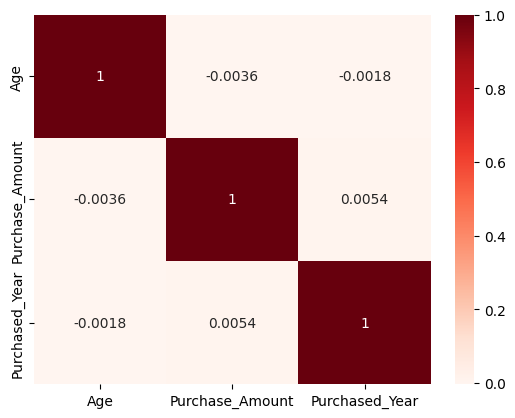

In [72]:
sns.heatmap(df[numerical_cols].corr(),annot=True,cmap="Reds")


In [73]:
df.dtypes

,0
User_Name,object
Age,int64
Country,object
Product_Category,object
Purchase_Amount,float64
Payment_Method,object
Purchased_Year,int32
Month_name,object
Age_Level,object


In [74]:
new_df=df.groupby("Product_Category")["Payment_Method"].value_counts().reset_index()
new_df.head()
new_df.Payment_Method.replace(to_replace=["Cash on Delivery","PayPal","Debit Card","Net Banking","Credit Card"],value=["COD","PP","DC","NB","CC"],inplace=True)

<ipython-input-74-197a8887b524>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [75]:
df.head(1)

,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Purchased_Year,Month_name,Age_Level
0,Ava Hall,63,Mexico,Clothing,780.69,Debit Card,2023,April,Old


In [76]:
new_df1=df.groupby("Product_Category")["Purchase_Amount"].agg(["sum","mean"]).sort_values(by="sum").reset_index()
new_df1.head()
new_df1["sum"].sum()

np.float64(25157989.65)

In [77]:
total_money=df.Purchase_Amount.sum()
new_df1["Parcentage_of_money"]=[np.round(np.divide(money,total_money)*100,2) for money in new_df1["sum"].values]
#new_df1["Parcentage_of_money"]=[str(parcentage)+"%" for parcentage in new_df1["Parcentage_of_money"].values]


Text(0.5, 1.0, 'Parcentage of money spent for different products')

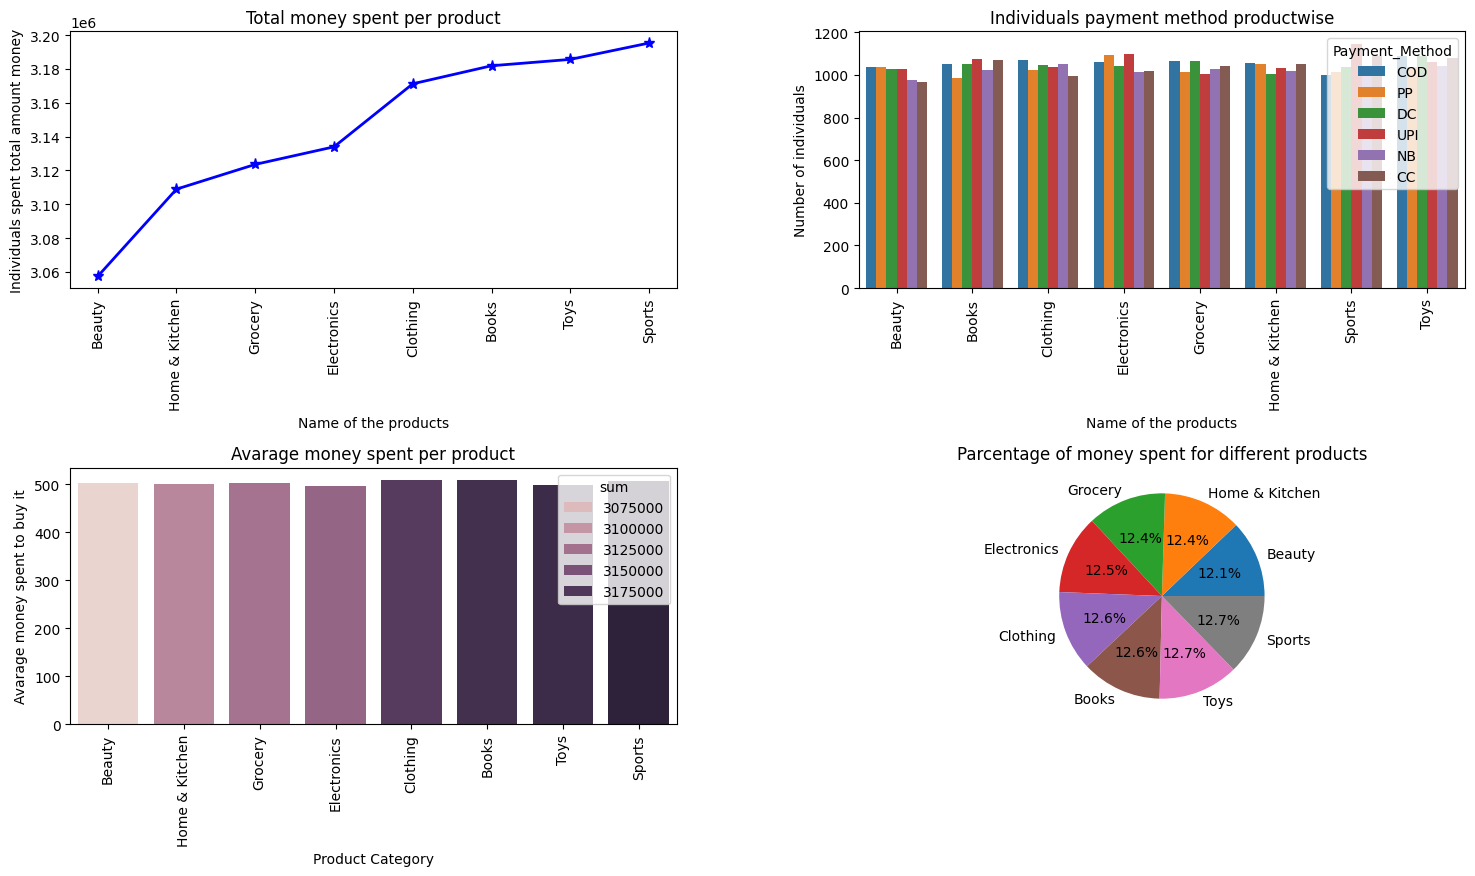

In [78]:
fig,axes=plt.subplots(2,2,figsize=(18,9))
plt.subplots_adjust(wspace=0.3, hspace=0.7)



#Position [0,1]
ax=sns.barplot(data=new_df,x="Product_Category",y="count",hue="Payment_Method",ax=axes[0,1])
ax.set_xlabel("Name of the products")
ax.set_ylabel("Number of individuals")
ax.set_title("Individuals payment method productwise")
#ax.set_xticklabels(ax.get_xlabel(),rotation=90)
ax.tick_params(axis='x', rotation=90)



#Position [0,0]
axes[0,0].plot(new_df1["Product_Category"],new_df1["sum"],color="blue",linewidth=2,marker="*",markersize=8)
axes[0,0].set_xlabel("Name of the products")
axes[0,0].set_ylabel("Individuals spent total amount money")
axes[0,0].set_title("Total money spent per product")
axes[0,0].tick_params(axis='x',rotation=90)


#Position [1,1]
ax1=sns.barplot(data=new_df1,x="Product_Category",y="mean",hue="sum",ax=axes[1,0])
ax1.set_xlabel("Product Category")
ax1.set_ylabel("Avarage money spent to buy it")
ax1.set_title("Avarage money spent per product")
ax1.tick_params(axis="x",rotation=90)



#position [1,1]


axes[1,1].pie(new_df1["Parcentage_of_money"],labels=new_df1["Product_Category"],autopct='%1.1f%%')
axes[1,1].set_title("Parcentage of money spent for different products")

In [79]:
df.head()

,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Purchased_Year,Month_name,Age_Level
0,Ava Hall,63,Mexico,Clothing,780.69,Debit Card,2023,April,Old
1,Sophia Hall,59,India,Beauty,738.56,PayPal,2023,July,Old
2,Elijah Thompson,26,France,Books,178.34,Credit Card,2023,September,Middle Age
3,Elijah White,43,Mexico,Sports,401.09,UPI,2023,June,Old
4,Ava Harris,48,Germany,Beauty,594.83,Net Banking,2024,October,Old


In [80]:
counted_df=df[["Payment_Method","Age"]].value_counts().reset_index()
ax=px.bar(counted_df,x="Payment_Method",y="count")
ax.update_layout(
    height=400,
    width=800,
    title="Payment method followed by number of individuals",
)

In [81]:
df.head()

,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Purchased_Year,Month_name,Age_Level
0,Ava Hall,63,Mexico,Clothing,780.69,Debit Card,2023,April,Old
1,Sophia Hall,59,India,Beauty,738.56,PayPal,2023,July,Old
2,Elijah Thompson,26,France,Books,178.34,Credit Card,2023,September,Middle Age
3,Elijah White,43,Mexico,Sports,401.09,UPI,2023,June,Old
4,Ava Harris,48,Germany,Beauty,594.83,Net Banking,2024,October,Old


In [82]:
#Payment_methodwise analysis
gdf=df.groupby(["Payment_Method"])["Age_Level"].agg(["value_counts"]).reset_index()

In [83]:
ax=px.bar(gdf,x="Payment_Method",y="value_counts",color="Age_Level")
ax.update_layout(
    height=400,
    width=800,
    title="Payment method followed by different age groups",
)

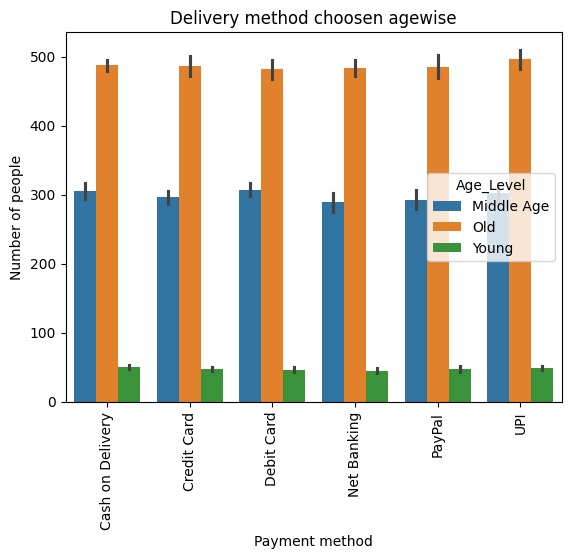

In [84]:
gdf1=df.groupby(["Payment_Method","Age_Level"])["Country"].agg(["value_counts"])
ax=sns.barplot(data=gdf1,x=gdf1.index.get_level_values(0),y=gdf1["value_counts"].values,hue=gdf1.index.get_level_values(1))
ax.set_xlabel("Payment method")
ax.set_ylabel("Number of people")
ax.set_title("Delivery method choosen agewise")
ax.tick_params(axis="x",rotation=90)

<Axes: xlabel='Age_Level', ylabel='value_counts'>

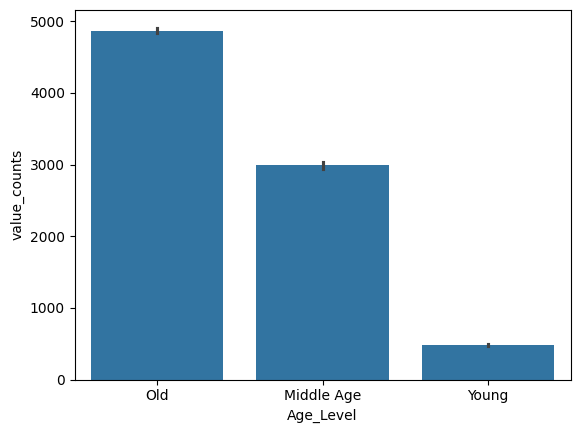

In [85]:
sns.barplot(data=gdf,x="Age_Level",y="value_counts")

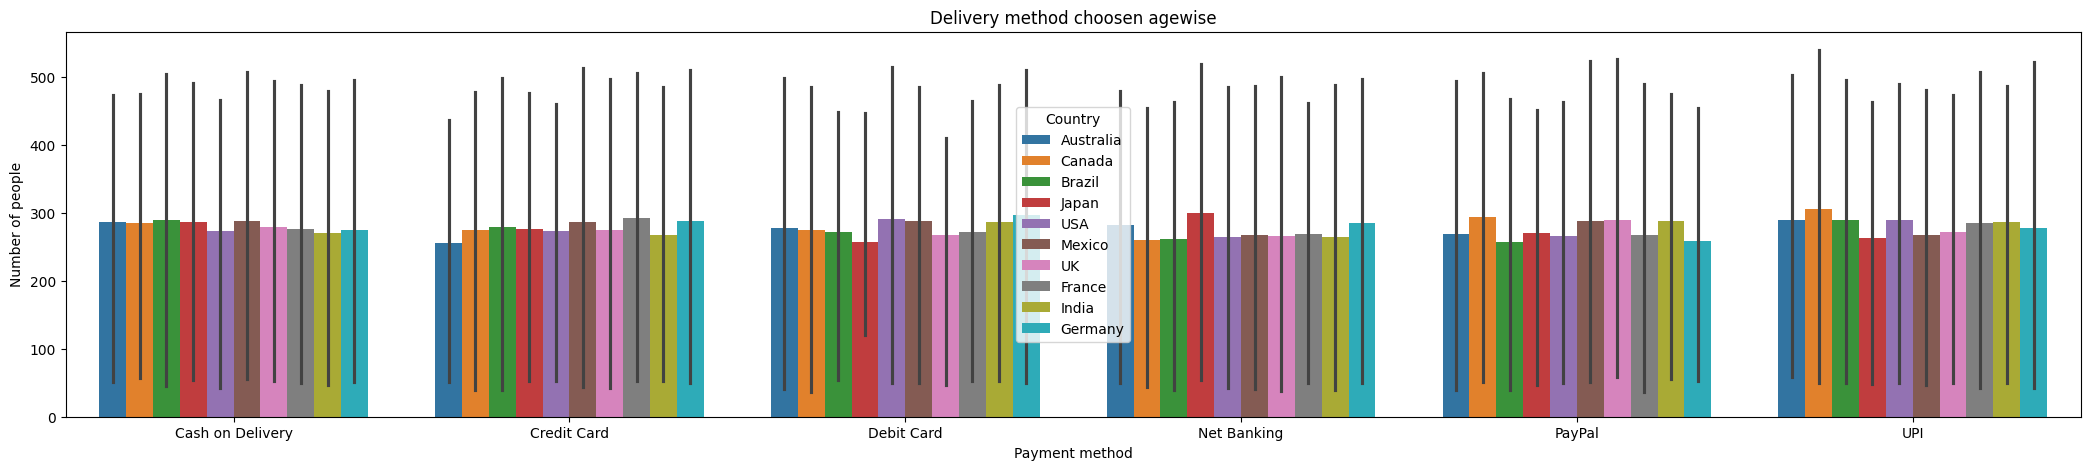

In [86]:
plt.figure(figsize=(26,5))
gdf1=df.groupby(["Payment_Method","Age_Level"])["Country"].agg(["value_counts"])
ax=sns.barplot(data=gdf1,x=gdf1.index.get_level_values(0),y=gdf1["value_counts"].values,hue=gdf1.index.get_level_values(2))
ax.set_xlabel("Payment method")
ax.set_ylabel("Number of people")
ax.set_title("Delivery method choosen agewise")
ax.tick_params(axis="x",rotation=0)

In [87]:
#df["Purchased_Year"]=["2025(running)" if year==2025 else year for year in df["Purchased_Year"].values]
gf=df.groupby(["Purchased_Year","Payment_Method"])["Purchase_Amount"].agg(["sum","count"])
gf.index.get_level_values(0)

Index([2023, 2023, 2023, 2023, 2023, 2023, 2024, 2024, 2024, 2024, 2024, 2024,
       2025, 2025, 2025, 2025, 2025, 2025],
      dtype='int32', name='Purchased_Year')

In [88]:
ax = px.bar(gf,x=gf.index.get_level_values(0), y=gf["sum"].values, color=gf.index.get_level_values(1))
ax.update_layout(
    height=400,
    width=800,
    xaxis_title="Year",
    yaxis_title="Amount of money[$]"
)
ax.show()

<Axes: xlabel='Month_name'>

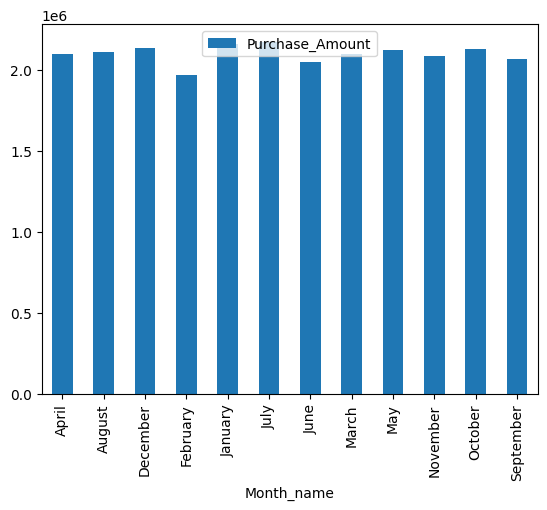

In [89]:
df.groupby("Month_name")["Purchase_Amount"].sum().reset_index().plot(kind="bar",x="Month_name",y="Purchase_Amount")